## **Fazendo uma regressão logística para prever se a pessoa tem doença do coração:**

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [146]:
df = pd.read_csv('heart.csv')
df.columns = df.columns.str.replace('target', 'heart_disease')

In [133]:
#df.drop(columns='target', inplace=True)

In [147]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


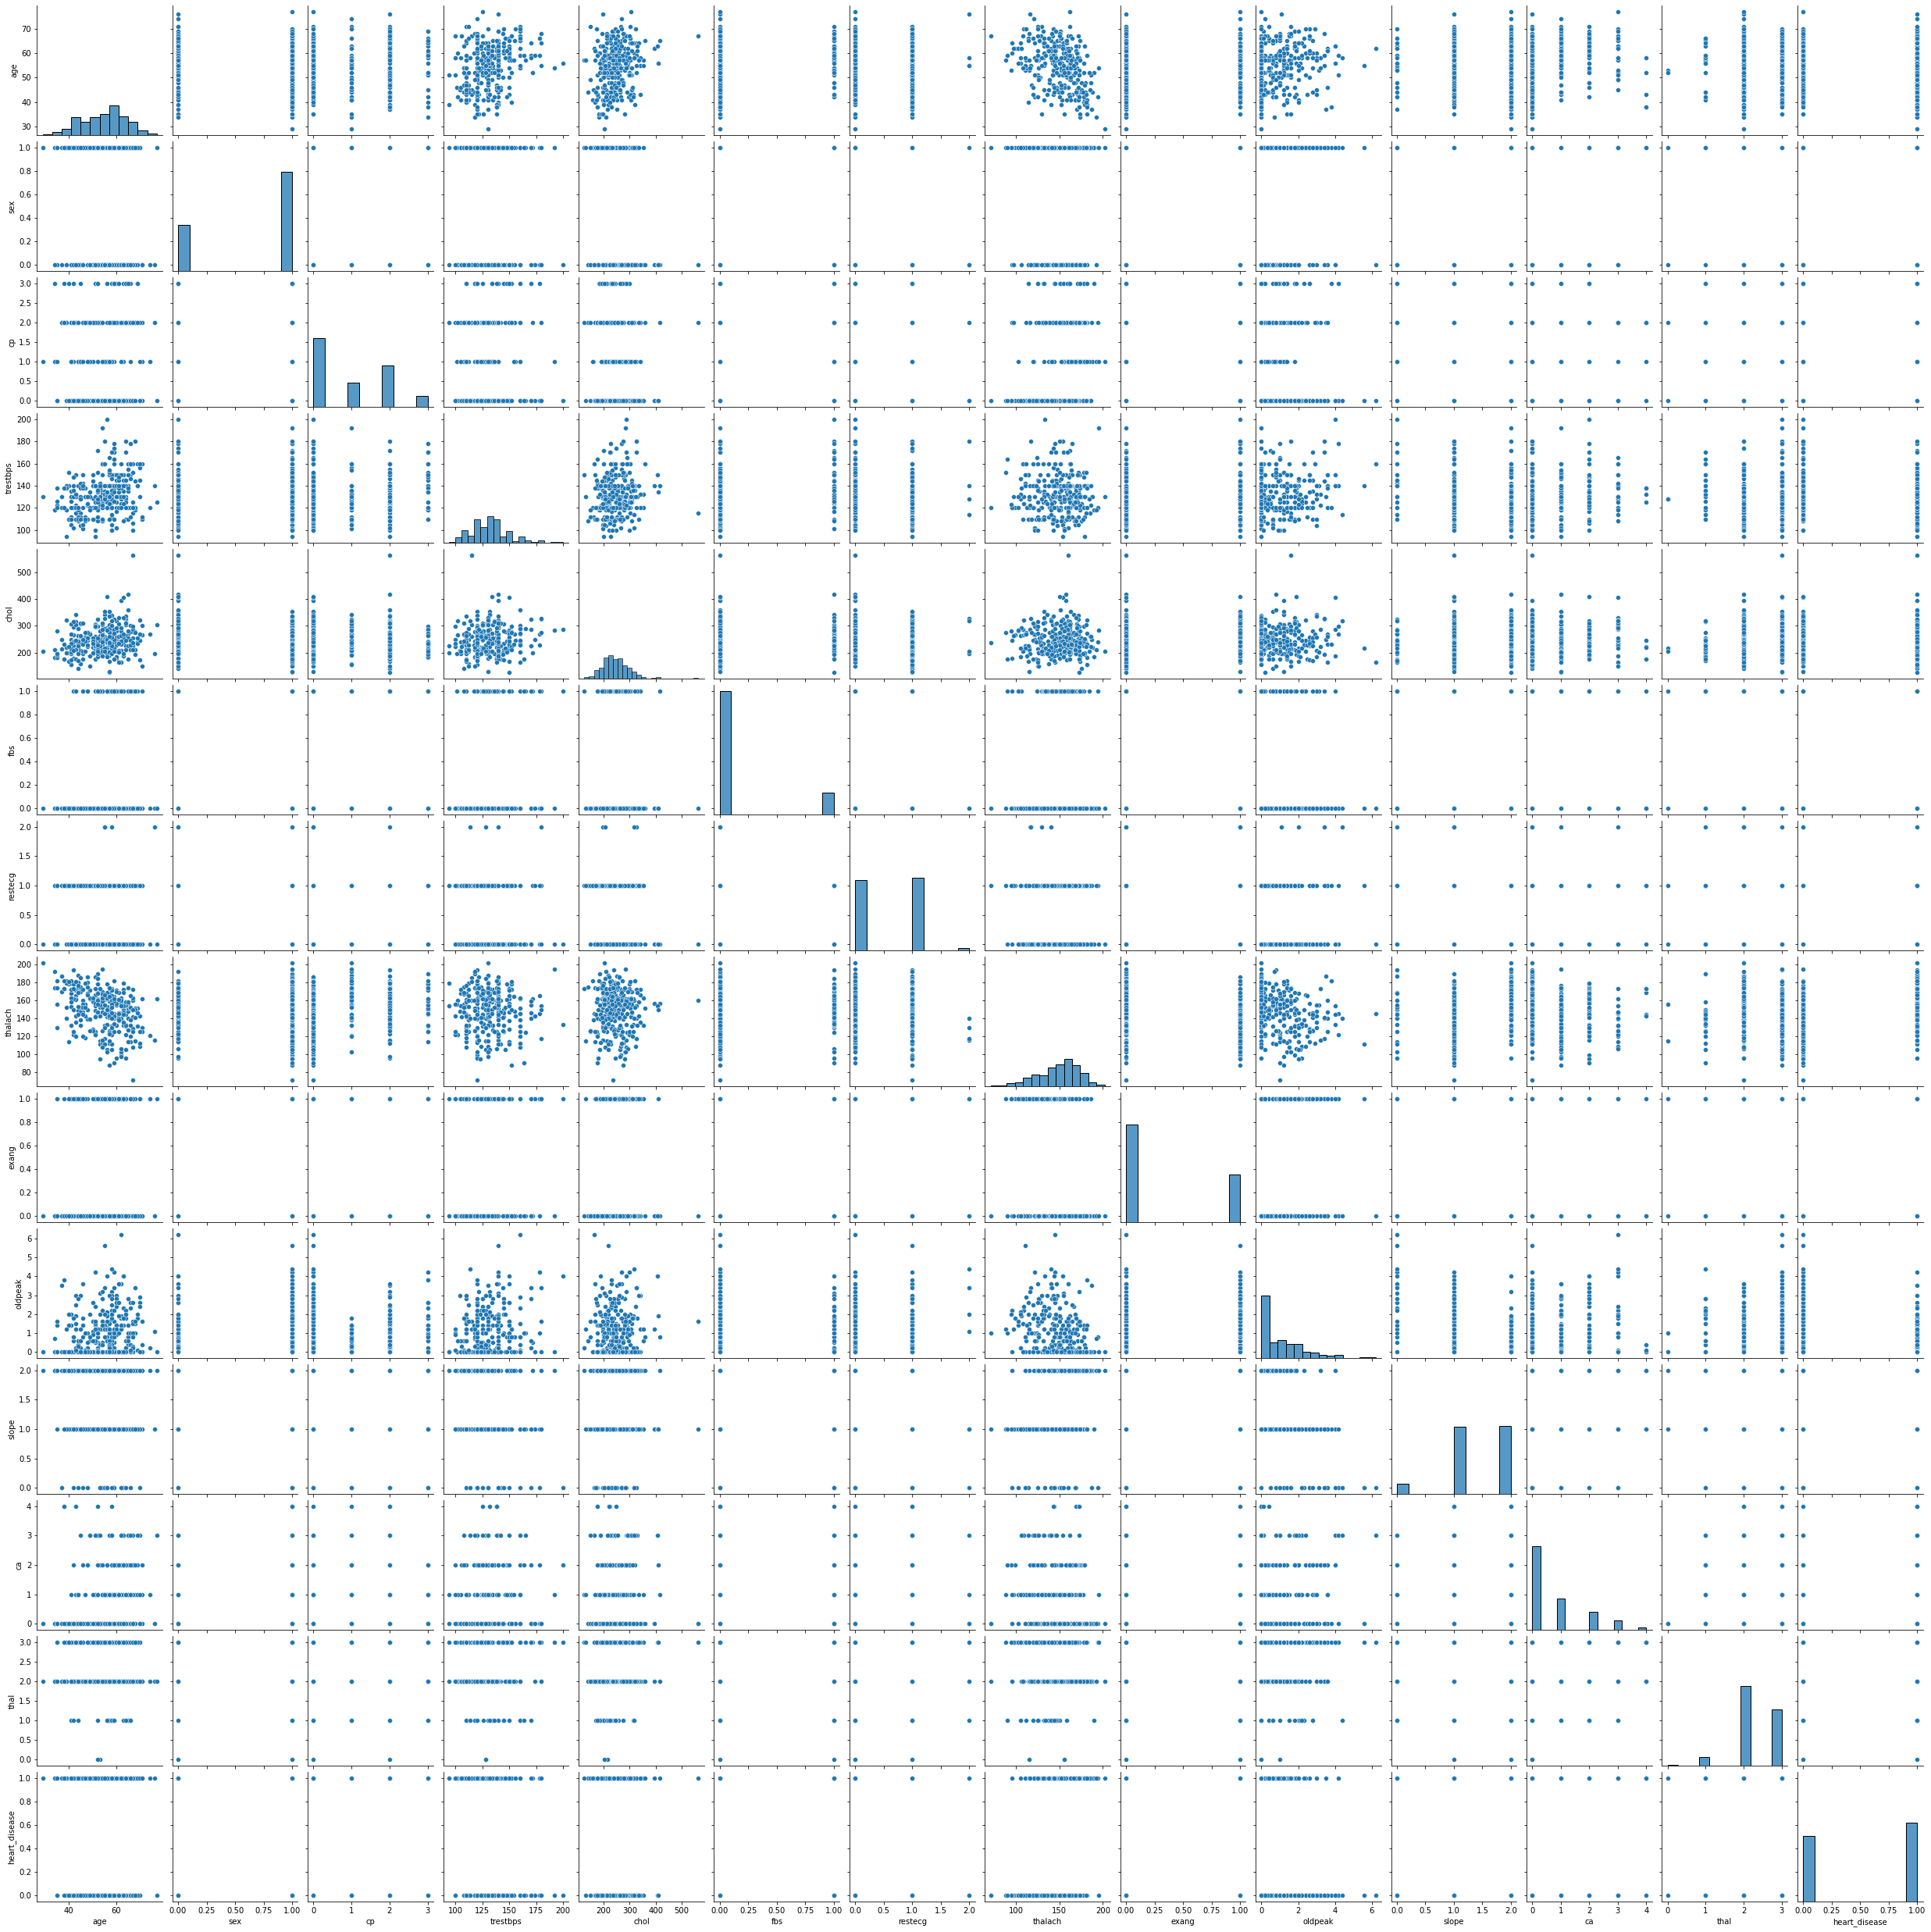

In [150]:
sns.pairplot(df);

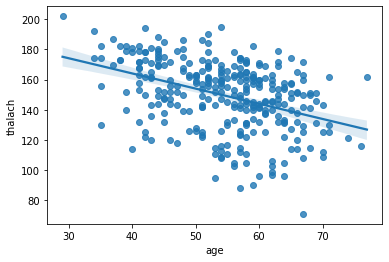

In [152]:
sns.regplot(x='age', y='thalach', data=df);

## **Entendendo o algoritmo de regressão logística:**

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [122]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [148]:
X = df.drop(columns='heart_disease', axis=1)
y = df['heart_disease']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
model = LogisticRegression(max_iter= 50000)

In [139]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=50000)

In [140]:
y_pred = model.predict(X_test)

### Classification Report:

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



**Precision:** Indica a precisão do algoritmo, o quão bem ele performou pra cada variável 0 ou 1

**Recall** Indica a precisão de algoritmos que eram positivos e ele acertou

**f1-score:** É a média de pontuação entre o precision e o recall

**Support:** Quantos exemplos ele examinou

### **Matriz de Confusão:**

In [142]:
print(confusion_matrix(y_test, y_pred))

[[32  9]
 [ 8 42]]


**Diagonal principal:** Apresenta os dados que foram preditos corretamente pelo algoritmo. O **32** representa os **verdadeiros positivos (Que tinham doenças cardiácas e o algoritmo preveu certo)** e os **verdadeiros negativos (42)**, que **não tinham doenças cardíacas e o algoritmo preveu corretamente**

**Diagonal invertida:** Apresenta os dados que foram preditos de forma errada pelo algoritmo. O **8** contém falsos negativos, ou seja, que **o algoritmo disse que não tinha, mas que na verdade tinham doenças cardiácas.** Já o número **9** representa os falsos positivos, ou seja, **o algoritmo disse que tinha, mas na verdade, não tinha doença cardiaca**